# Cardiovascular Disease Prediction (II EDA)

#### Project Overview

Coronary Heart Disease (CHD) remains one of the leading causes of death globally. Predicting the 10-year risk of CHD based on demographic, behavioral, and clinical data is essential for preventive healthcare.

- [I Data Cleaning](https://github.com/monikase/Data_Science/blob/main/03_CHD_Prediction/CHD_I_DataCleaning.ipynb)
- **[II EDA](https://github.com/monikase/Data_Science/blob/main/03_CHD_Prediction/CHD_II_EDA.ipynb)**
- [III Modeling](https://github.com/monikase/Data_Science/blob/main/03_CHD_Prediction/CHD_III_Modeling.ipynb)  

This is a 2nd part of the project that aims to identify key risk factors to predict 10-year CHD risk.

#### Objectives

- Explore the distribution of each feature.
- Identify how individual variables are associated with the 10-year risk of CHD.
- Provide insights that will inform feature selection and guide the design of machine learning models in the next stage.

---

#### EDA Summary

- **Key CHD risk factors:** Age, blood pressure, glucose, diabetes, cholesterol, and BMI show the strongest associations.
- **Moderate effects:** Smoking and gender.
- **Weaker effects:** Heart rate and stroke history.
- **Population health:** Majority have high blood pressure, elevated cholesterol, or are overweight.
- Established medical levels of the features (is_obese, high_glucose, high_cholesterol) will be tested within feature engineering section in modeling part.

#### Columns Overview

| Category        | Feature              | Key Insights                                                                 |
|-----------------|----------------------|-------------------------------------------------------------------------------|
| **Demographics** | Age                 | CHD risk rises from 40+, peaking at 60–65 (21.3% of cases).                   |
|                 | Gender              | Men: higher CHD at 35–55 (18.5% vs 12.4%); women catch up after 55.           |
| **Lifestyle**   | Smoking             | Smokers: 16.3% CHD vs 13.8% non-smokers; risk higher among younger smokers.   |
|                 | Education           | Non-linear: lowest (18.1%) and highest (14.5%) education levels show higher risk. |
| **Clinical**    | Blood Pressure      | Strong predictor: \~75% at-risk/hypertensive; prehypertension common (~40%).   |
|                 | Hypertension        | CHD rate >2× higher (23.8% vs 11.0%).                                         |
|                 | BP Medication       | On meds: 33% CHD vs 14.5% not on meds (reflects pre-existing risk).           |
|                 | Cholesterol         | Avg 237 mg/dL (“At Risk”); higher cholesterol → higher CHD; extreme outliers ~700. |
|                 | BMI                 | Risk rises with BMI: Normal 12.4%, Overweight 16.6%, Obese 18.9%, Underweight 19.5% (small group). |
|                 | Glucose             | Strong predictor: Normal 14.2%, Pre-diabetic 16.6%, Diabetic 46%.             |
|                 | Diabetes            | Small group (2.6%); very high CHD rate (37.9% vs 14.4%).                      |
|                 | Stroke              | Very rare (0.6%); CHD 45.5%, but sample too small.                            |
|                 | Heart Rate          | Weak predictor : median identical across CHD groups.                           |


---

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
from collections import Counter
from scipy.stats import chi2_contingency

Importing functions from **functions.py** file:

In [2]:
from functions import (
    summarize_chd,
    plot_chd_categorical_distribution,
    plot_age_distribution_by_category,
    plot_bins,
    plot_variable_by_chd,
    plot_bp_categories,
    plot_hist,
    calculate_phi_correlation
)

In [3]:
# Plot style
def set_plot_theme():
    plt.style.use("seaborn-v0_8-dark")
    sns.set_theme(
        style="dark",
        palette="deep",
        font_scale=1.2
    )
    plt.rcParams["figure.figsize"] = (20, 5)

set_plot_theme()

---

### 1. Load Cleaned Data

In [4]:
df_cleaned_data = pd.read_parquet("df_chd_cleaned.parquet")

In [5]:
df_cleaned_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,1,1,3.0,0,0,0,0,221.0,148.0,85.0,24.68,90.0,80.0,1
1,36,4,0,0,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,1,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,0,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,1,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
categories = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]

for col in categories:
    df_cleaned_data[col] = df_cleaned_data[col].astype("category")

In [7]:
df_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3389 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              3389 non-null   int64   
 1   education        3389 non-null   category
 2   sex              3389 non-null   category
 3   is_smoking       3389 non-null   category
 4   cigsPerDay       3389 non-null   float64 
 5   BPMeds           3389 non-null   category
 6   prevalentStroke  3389 non-null   category
 7   prevalentHyp     3389 non-null   category
 8   diabetes         3389 non-null   category
 9   totChol          3389 non-null   float64 
 10  sysBP            3389 non-null   float64 
 11  diaBP            3389 non-null   float64 
 12  BMI              3389 non-null   float64 
 13  heartRate        3389 non-null   float64 
 14  glucose          3389 non-null   float64 
 15  TenYearCHD       3389 non-null   category
dtypes: category(8), float64(7), int64(1)
memory usa

In [8]:
df = df_cleaned_data.copy()

---

## 2. Exploratory Data Analysis

### 2.1. Analysis by **Age**

#### 2.1.1. Age Distribution

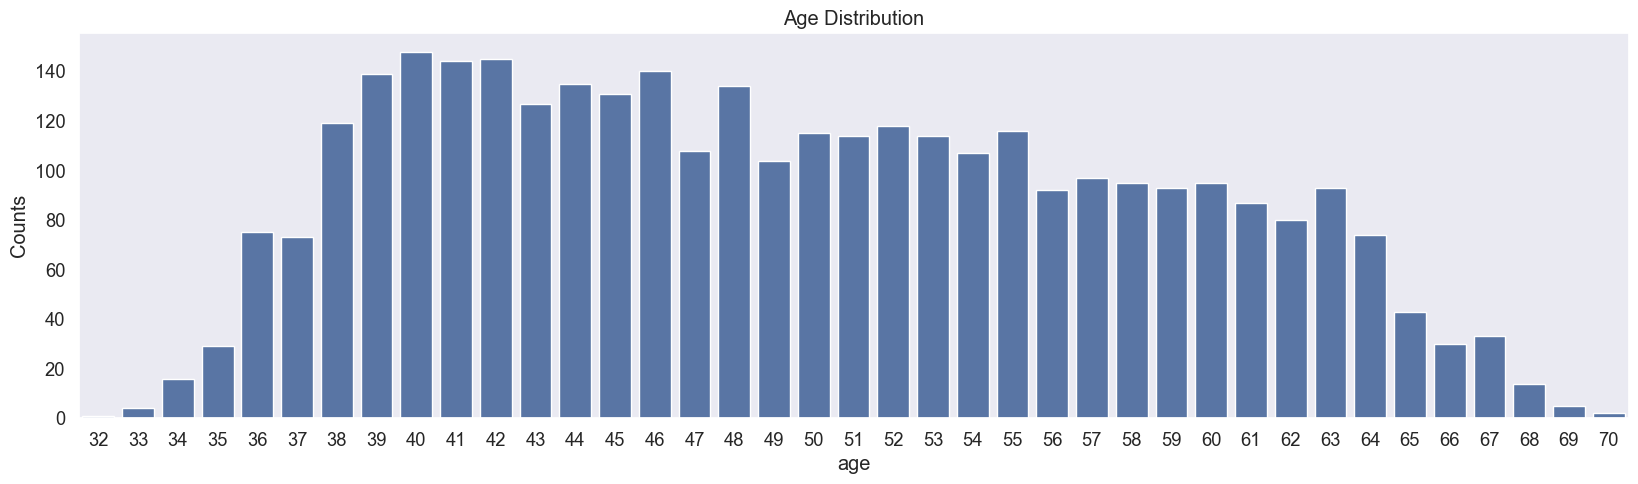

In [9]:
age_distribution = df["age"].value_counts().sort_index()
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.ylabel("Counts")
plt.title("Age Distribution");

#### 2.1.2. Age-wise Ten-Year-CHD Affected Distribution

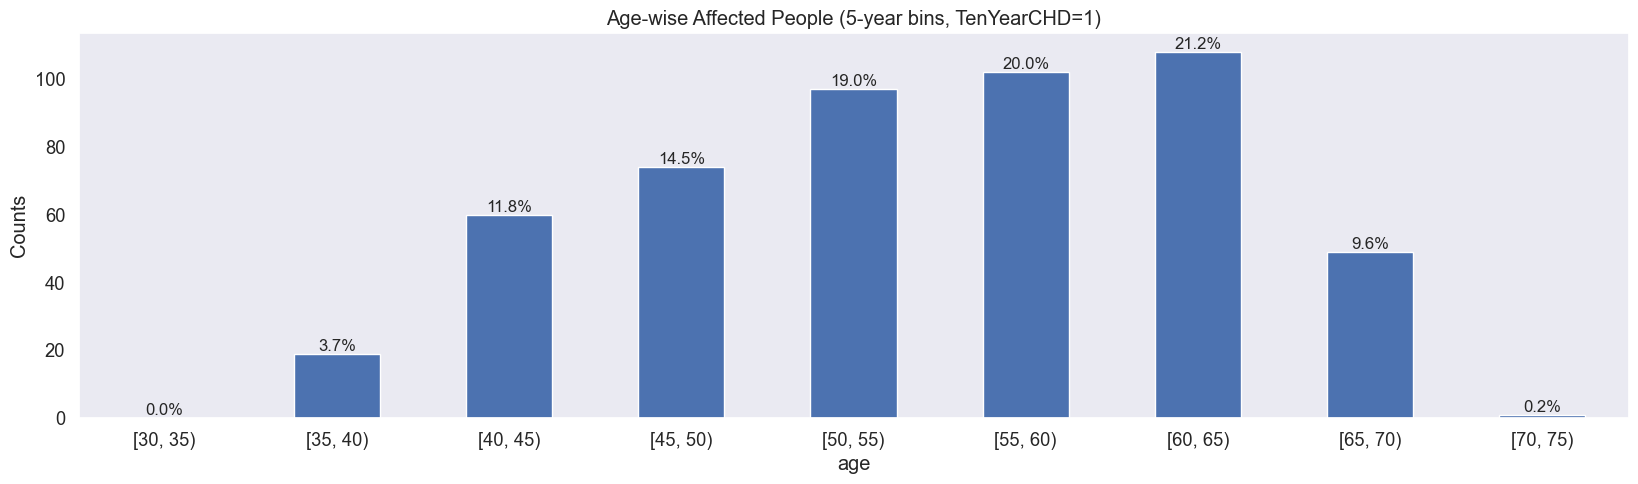

In [10]:
age_binned = pd.cut(df.loc[df["TenYearCHD"] == 1, "age"], bins=range(30, 76, 5), right=False)
counts = age_binned.value_counts(sort=False)
percents = counts / counts.sum() * 100

ax = counts.plot(kind="bar", rot=0, title="Age-wise Affected People (5-year bins, TenYearCHD=1)")
plt.ylabel("Counts")

for p, perc in zip(ax.patches, percents):
    ax.annotate(f"{perc:.1f}%", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=12)

#### Analysis by **Age: Insights**
- The dataset contains individuals 32 - 70 years old.
- Cardiovascular disease occurs in people **aged 35+**.
- Highest proportion of affected individuals is in the **60–65 year** old group **21.2%** of all cases.

**\*** Although the percentage of affected individuals rises sharply from 3.7% (ages 35–40) to 11.7% (40–45), this trend may partly reflect fewer records in the younger age group.

---

### 2.2. Analysis by **Gender**

#### 2.2.1. Gender Distribution

- Female: `sex == 1`
- Male: `sex == 0`

In [11]:
df_gender_summary = summarize_chd(df, "sex")
df_gender_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
sex,,,,
1,1922,56.7%,12.4%,7.0%
0,1467,43.3%,18.5%,8.0%


#### 2.2.2. Gender Distribution by Ten-Year-CHD

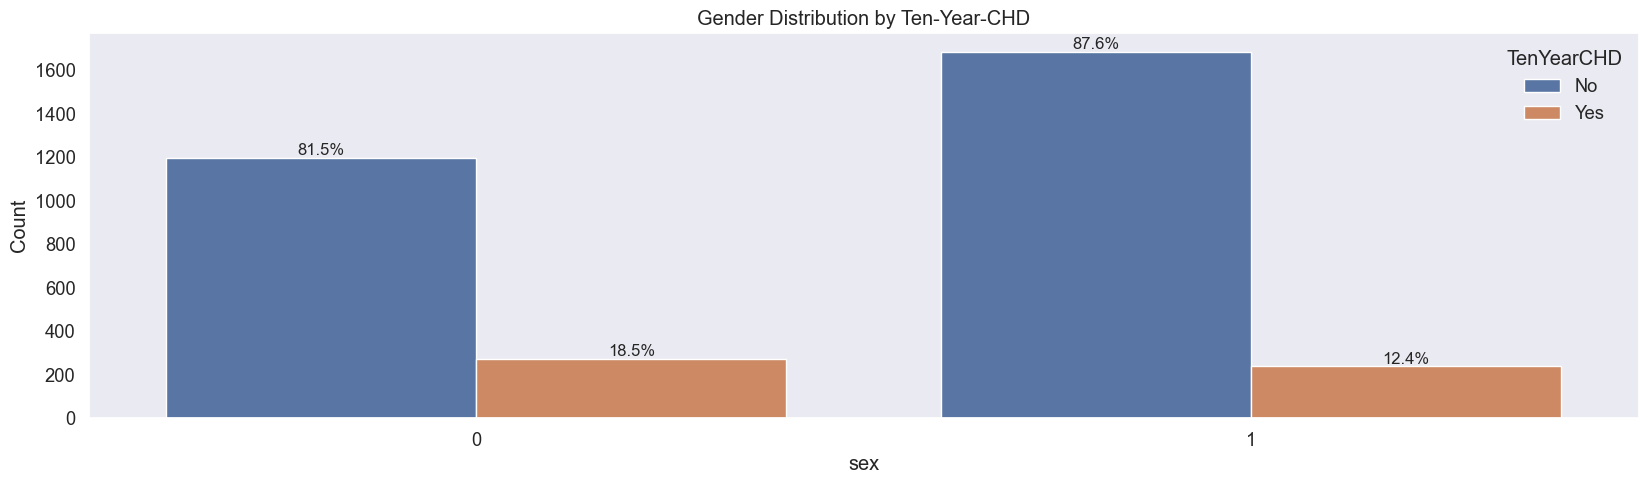

In [12]:
plot_chd_categorical_distribution(
    df=df, column_name="sex", legend_labels=["No", "Yes"],
    title="Gender Distribution by Ten-Year-CHD"
)

#### 2.2.3. Age and Gender Breakdown of Ten-Year-CHD Affected Individuals

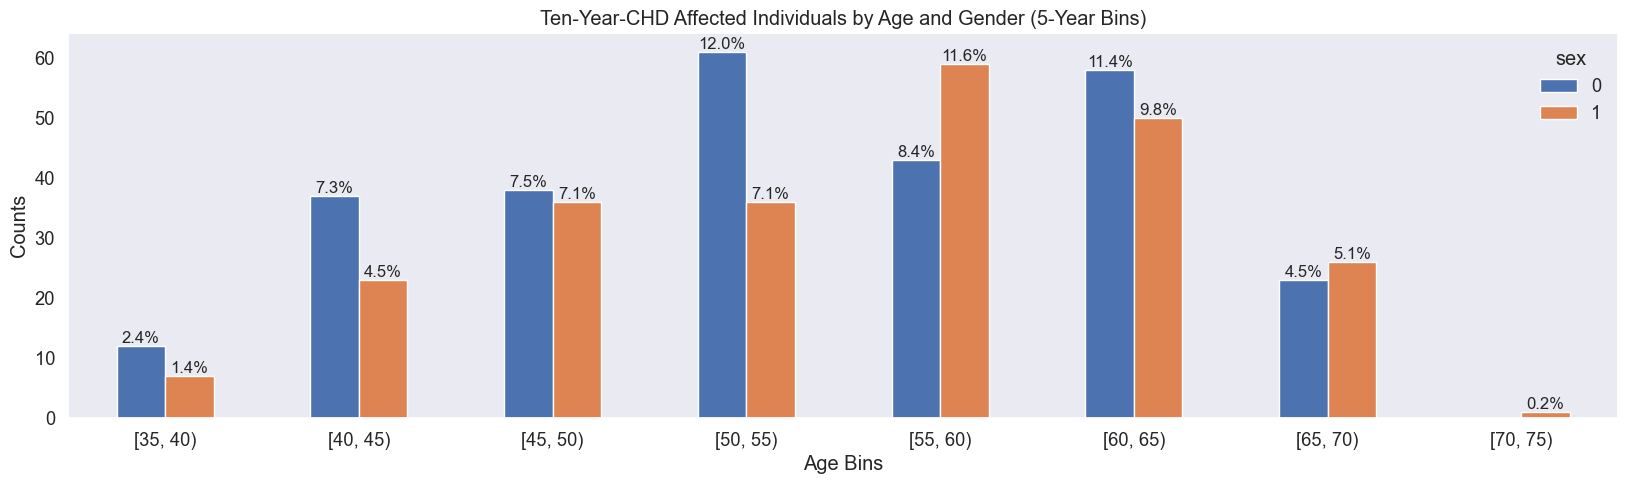

In [13]:
plot_age_distribution_by_category(df, "sex", 
    "Ten-Year-CHD Affected Individuals by Age and Gender (5-Year Bins)"
)

#### Analysis by **Gender: Insights**
- Dataset Gender Split: Females 56.7%, Males 43.3%.
- CHD Prevalence: In relative terms, **males have a higher proportion of CHD cases (18.5%)** compared to **females (12.4%)**.
- Age Patterns: Men are more affected at younger ages (35–55); the gap reverses or narrows in older age bins (55+).
- Peak Risk Age: Men 50–55, Women 55–60.

---

### 2.3. Analysis by **Tabacco Consumption**

#### 2.3.1. *'is_smoking'* Distribution

- Yes: `is_smoking == 1`
- No: `is_smoking == 0`

In [14]:
df_smoking_summary = summarize_chd(df, "is_smoking")
df_smoking_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
is_smoking,,,,
0,1702,50.2%,13.8%,6.9%
1,1687,49.8%,16.3%,8.1%


#### 2.3.2. *'is_smoking'* Breakdown by Ten-Year-CHD

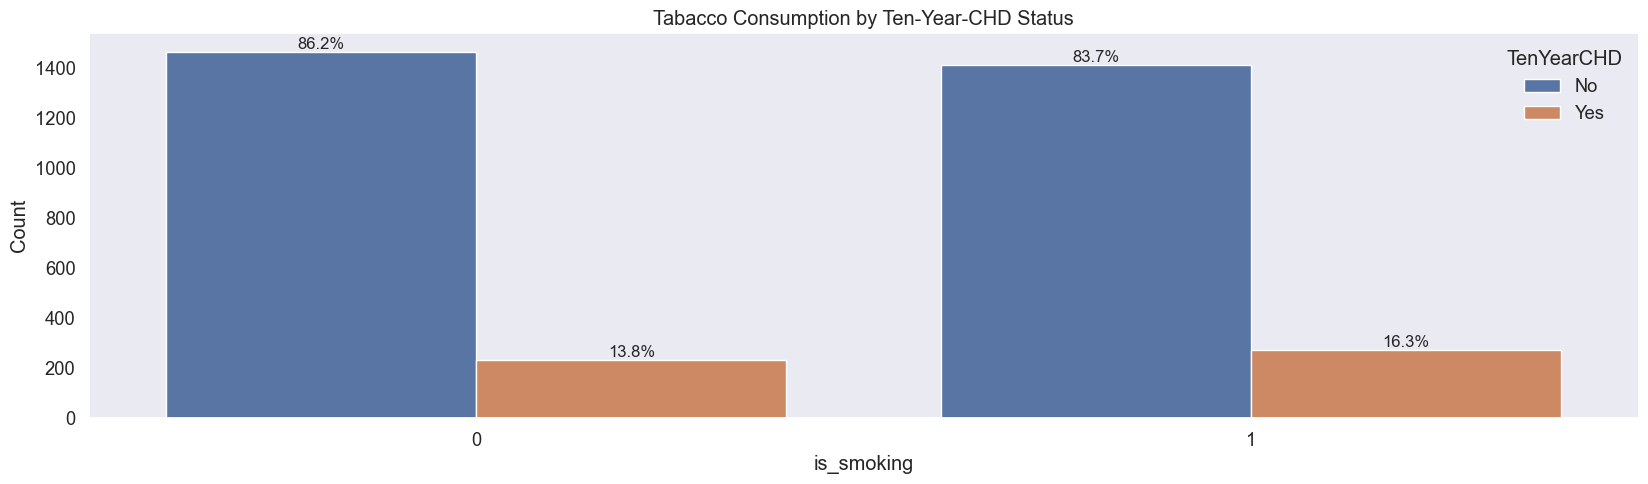

In [15]:
plot_chd_categorical_distribution(
    df=df, column_name="is_smoking", legend_labels=["No", "Yes"],
    title="Tabacco Consumption by Ten-Year-CHD Status"
)

#### 2.3.3. *'is_smoking'* and Age Breakdown of Ten-Year-CHD Affected Individuals

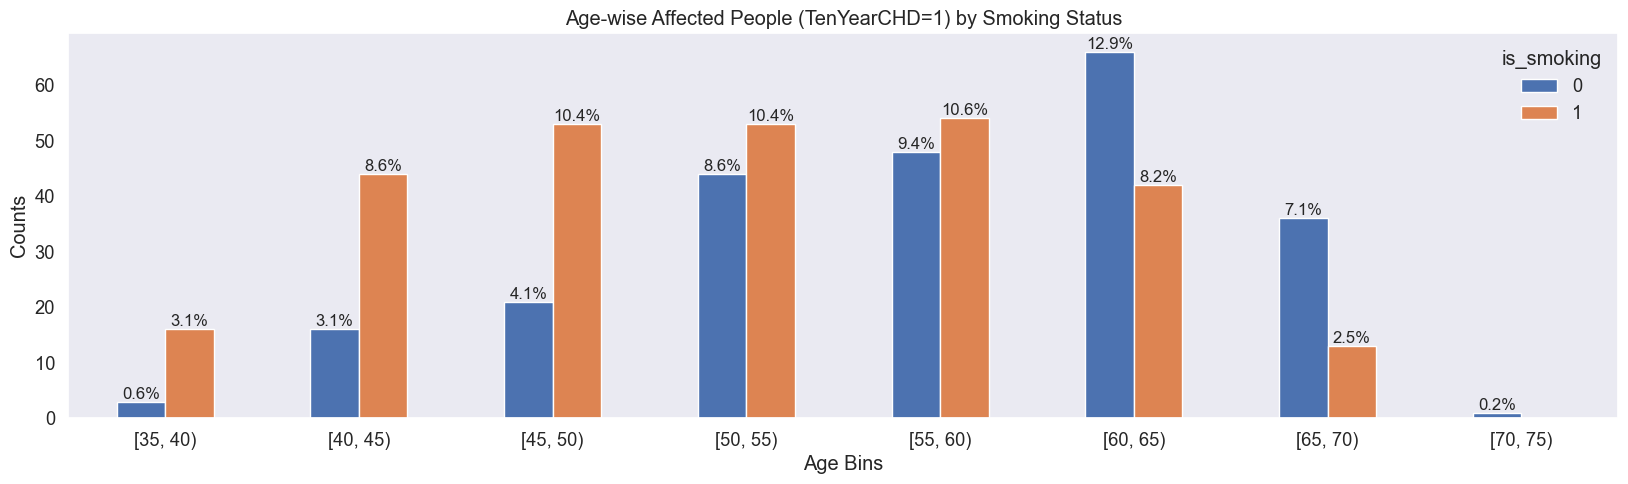

In [16]:
plot_age_distribution_by_category(df, "is_smoking", 
    "Age-wise Affected People (TenYearCHD=1) by Smoking Status"
)

#### 2.3.4. Cigarettes per Day by Ten-Year-CHD

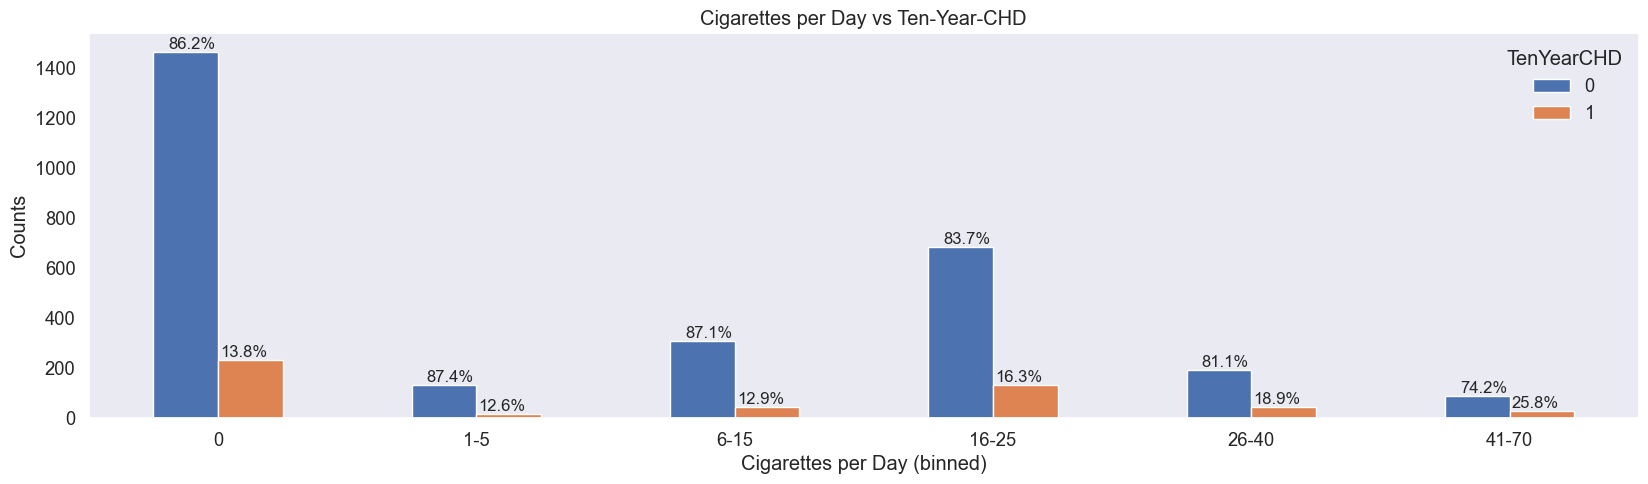

In [17]:
plot_bins(
    df, col="cigsPerDay", bins=[0, 1, 5, 15, 25, 40, 70],
    labels=["0", "1-5", "6-15", "16-25", "26-40", "41-70"],
    title="Cigarettes per Day vs Ten-Year-CHD",
    xlabel="Cigarettes per Day (binned)"
)

#### Analysis by **Tabacco Consumption: Insights**
- Smokers (49.8%) and non-smokers (50.2%) are nearly equally represented in the dataset.
- Smokers have a higher Ten-Year-CHD prevalence (16.3%) compared to non-smokers (13.8%).
- Ten-Year-CHD cases are more common among younger age groups smokers (35–50).

---

### 2.4. Analysis by **Education**

#### 2.4.1. Education levels distribution

In [18]:
df_education_summary = summarize_chd(df, "education")
df_education_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
education,,,,
1,1477,43.6%,18.1%,7.9%
2,990,29.2%,11.9%,3.5%
3,549,16.2%,12.8%,2.1%
4,373,11.0%,14.5%,1.6%


#### 2.4.2. Education levels distribution by Ten-Year-CHD

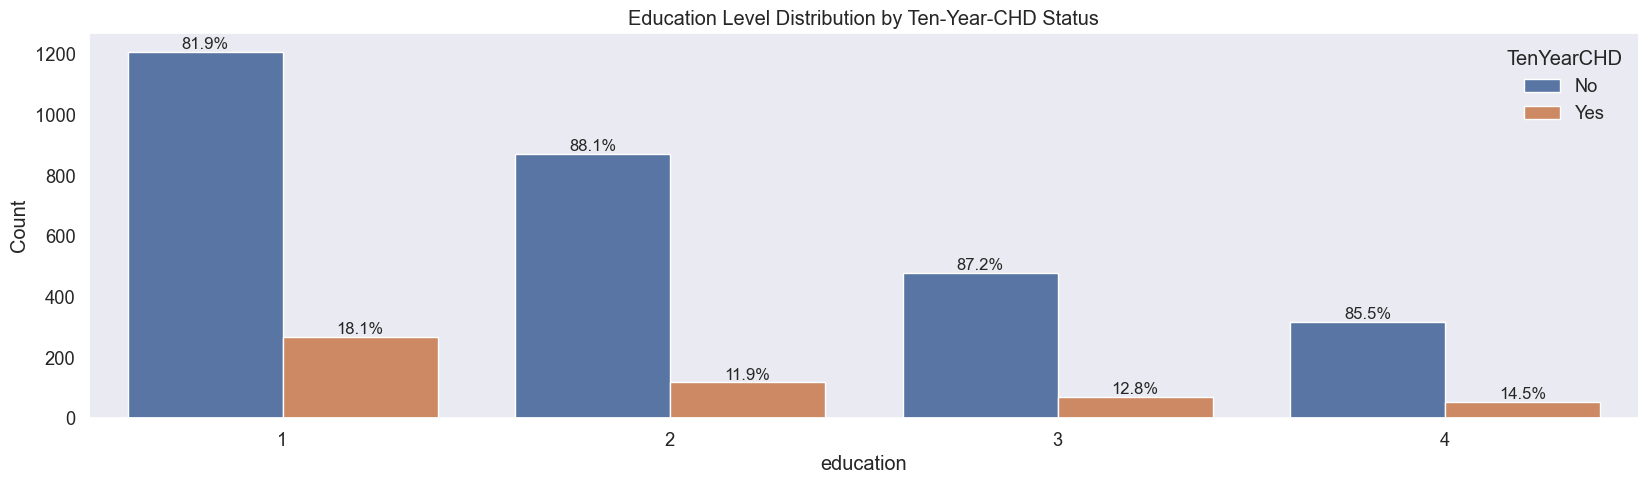

In [19]:
plot_chd_categorical_distribution(
    df=df, column_name="education", legend_labels=["No", "Yes"],
    title="Education Level Distribution by Ten-Year-CHD Status"    
)

#### Analysis by **Education: Insights**
- The dataset is heavily skewed toward lower education levels, with nearly three-quarters of the individuals having an education level of 1 or 2.
- The relationship between education and CHD risk appears to be non-linear, with the highest rates of CHD observed in both the lowest (Level 1 : 18.1%) and highest (Level 4 : 14.5%) education groups.

While the relationship isn't a simple linear one, there is still valuable information that a model can use: difference in the rates of Coronary Heart Disease (CHD) across the different education levels.

---

### 2.5. Analysis by **Blood Pressure Levels (sysBP, diaBP)**

#### 2.5.1. Blood Pressure Categorical Distribution

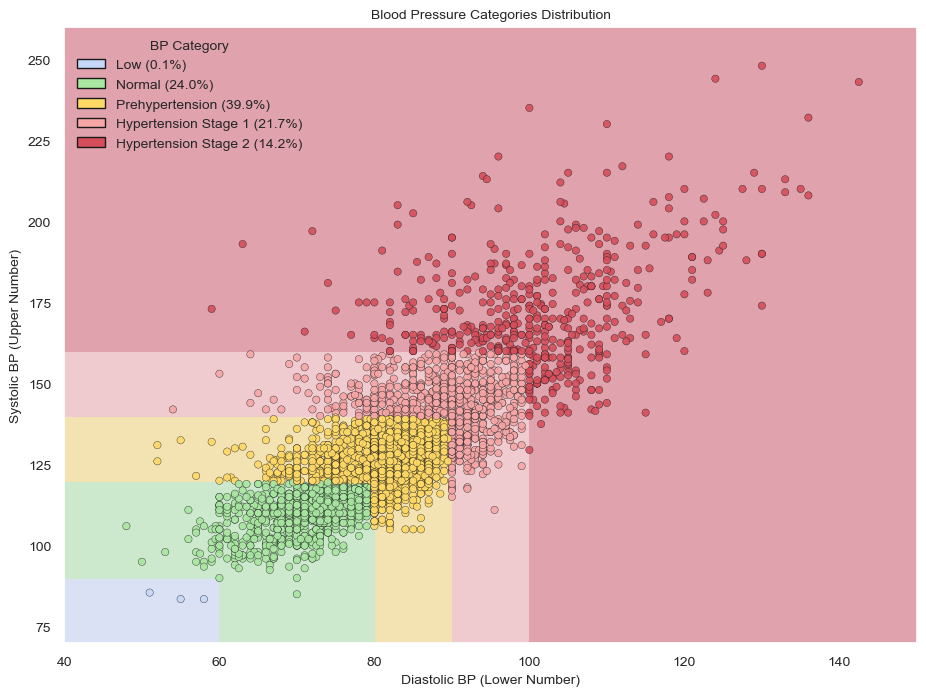

In [20]:
plot_bp_categories(df)

---

#### Systolic Blood Pressure

Systolic Blood Pressure range:
- **Normal:** <120
- **At risk:** 120-180
- **Hypertension crisis:** >180

In [21]:
df["sysBP"].describe()

count    3389.000000
mean      132.553261
std        22.120005
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       248.000000
Name: sysBP, dtype: float64

#### 2.5.1. Systolic Blood Pressure distribution

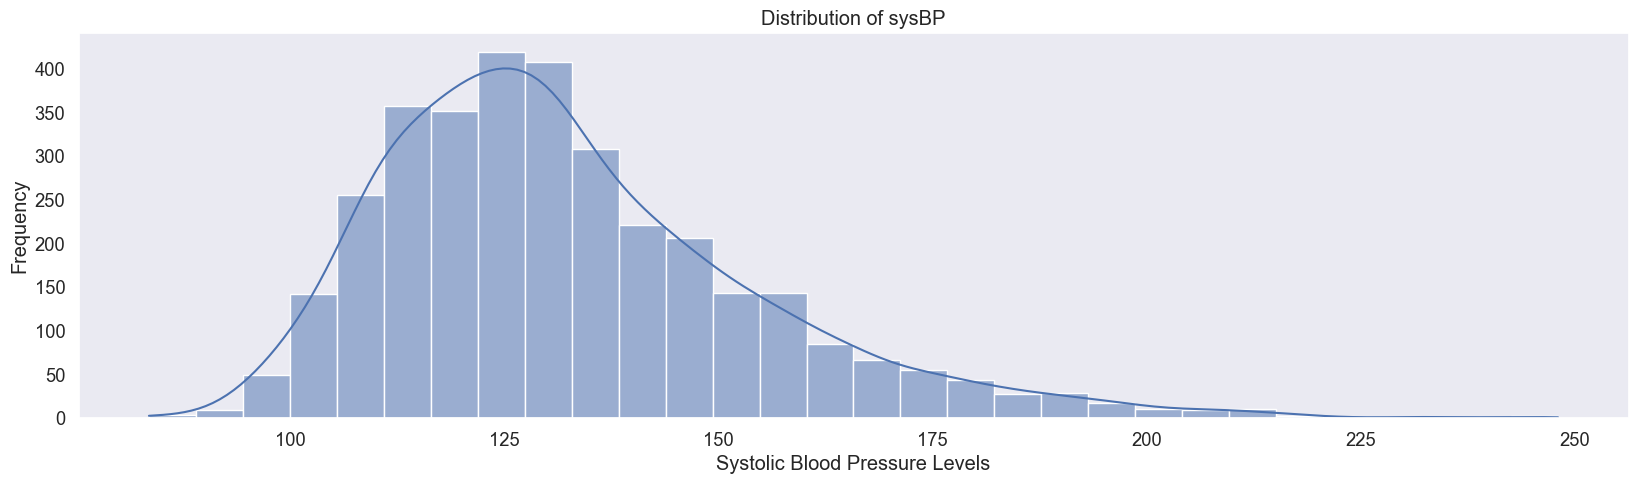

In [22]:
plot_hist(df, "sysBP", xlabel="Systolic Blood Pressure Levels")

#### 2.5.2. Systolic Blood Pressure Categorical Distribution by TenYearCHD

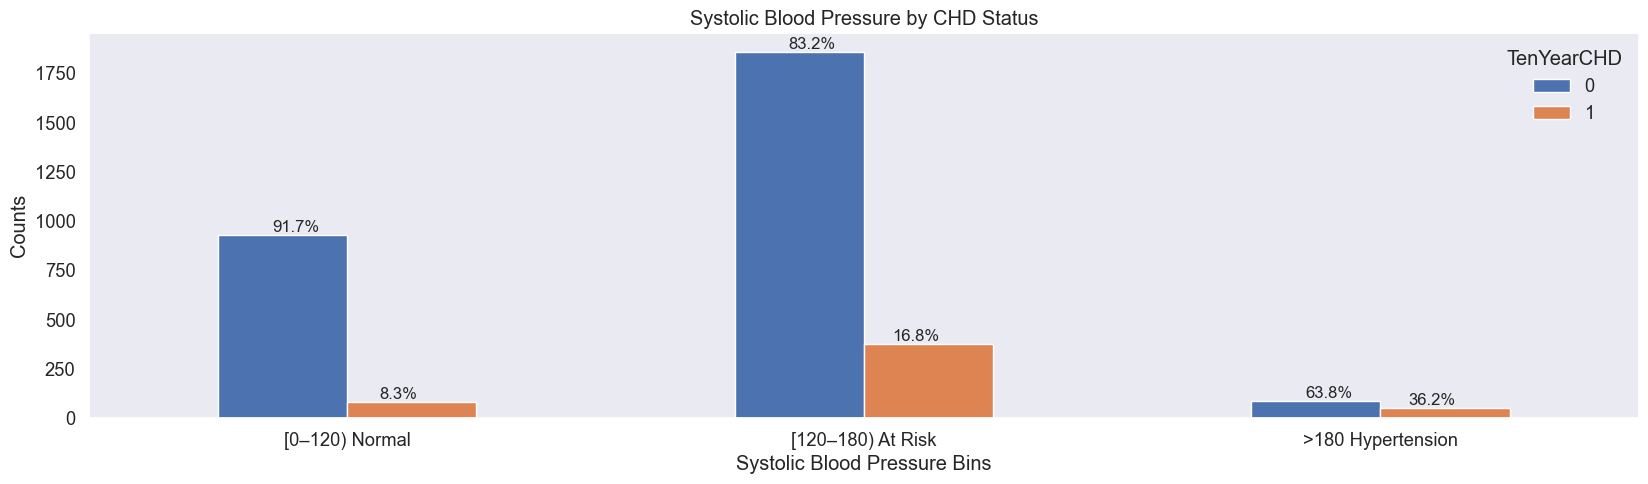

In [23]:
plot_bins(
    df, col="sysBP", bins=[0, 120, 180, 250],
    labels=["[0–120) Normal", "[120–180) At Risk", ">180 Hypertension"],
    title="Systolic Blood Pressure by CHD Status",
    xlabel="Systolic Blood Pressure Bins"
)

#### 2.5.3. Systolic Blood Pressure boxplot by Ten-Year-CHD

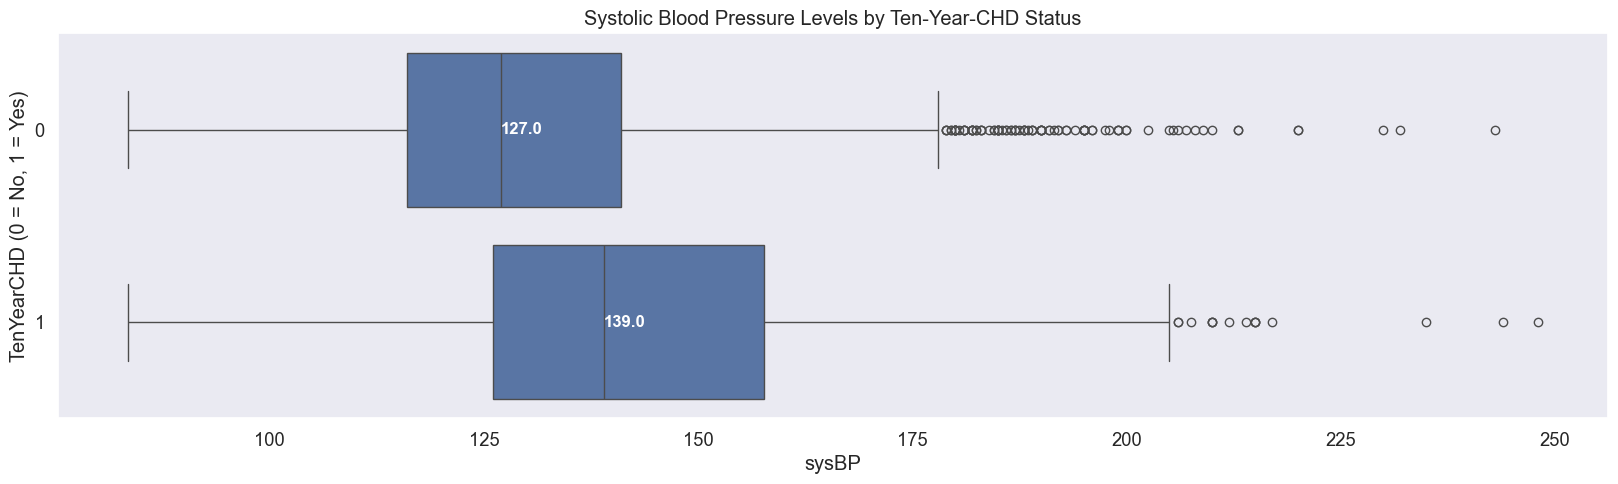

In [24]:
plot_variable_by_chd(df, "sysBP", "Systolic Blood Pressure Levels by Ten-Year-CHD Status")

---

#### **Diastolic Blood Pressure**

In [25]:
df["diaBP"].describe()

count    3389.000000
mean       82.867660
std        11.991965
min        48.000000
25%        74.500000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64

#### 2.5.4. Diastolic Blood Pressure distribution

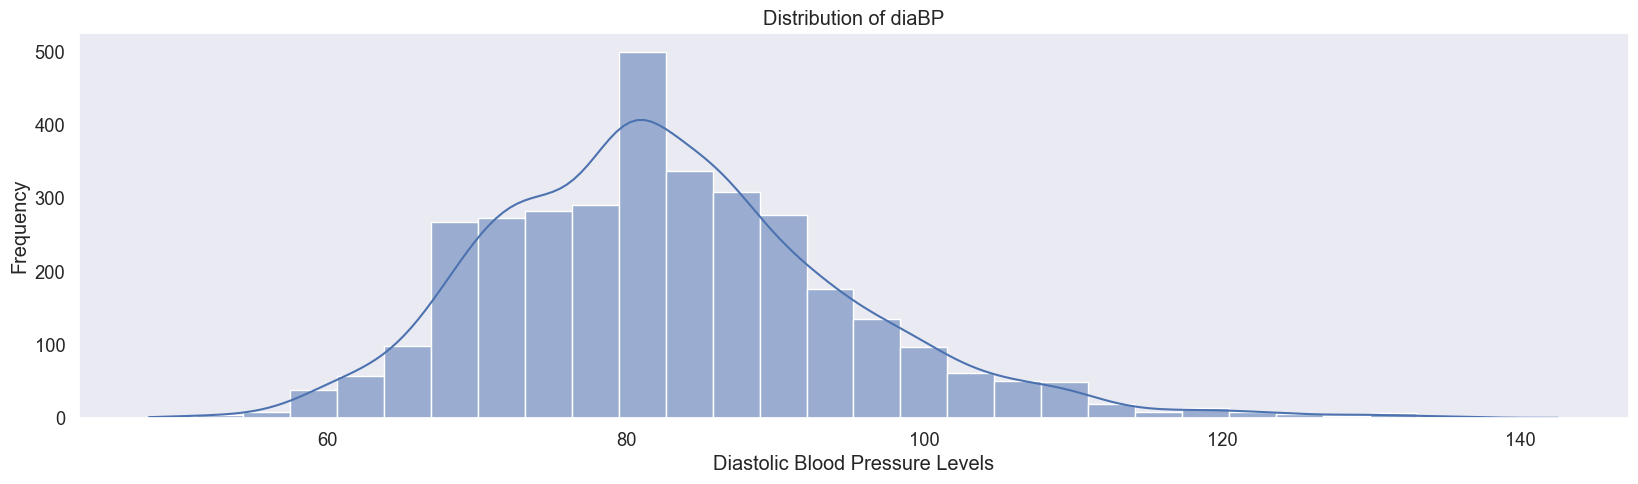

In [26]:
plot_hist(df, "diaBP", xlabel="Diastolic Blood Pressure Levels")

#### 2.5.5. Diastolic Blood Pressure Categorical Distribution by Ten-Year-CHD

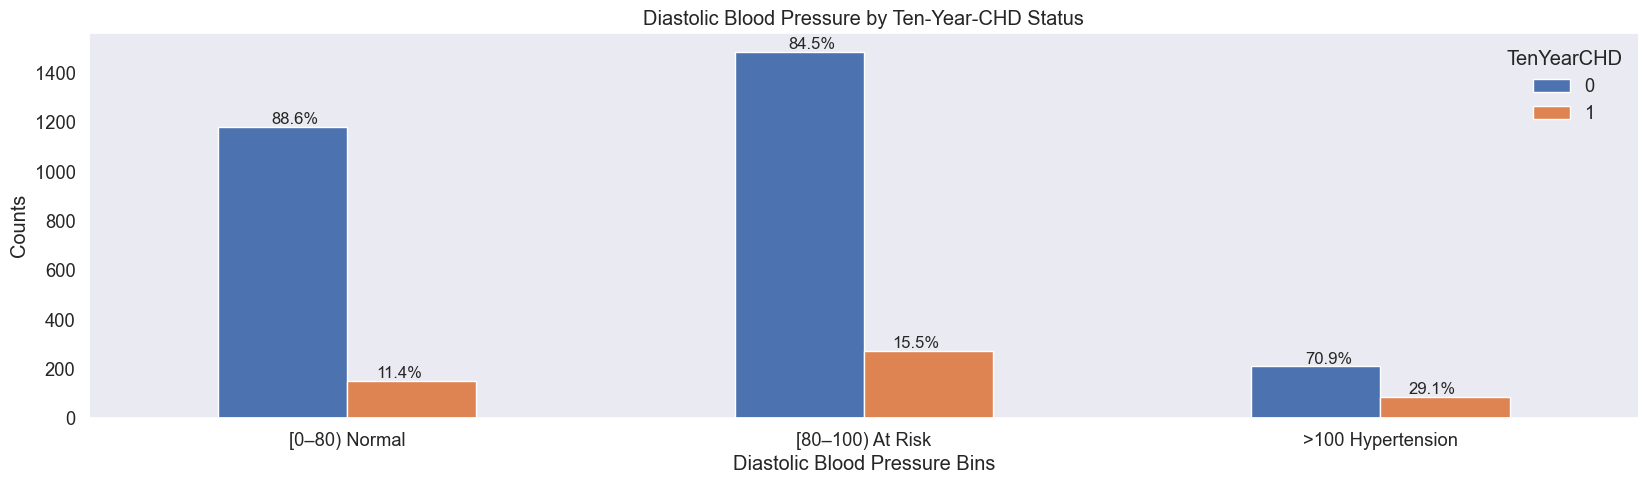

In [27]:
plot_bins(
    df, col="diaBP", bins=[0, 80, 100, 150],
    labels=["[0–80) Normal", "[80–100) At Risk", ">100 Hypertension"],
    title="Diastolic Blood Pressure by Ten-Year-CHD Status",
    xlabel="Diastolic Blood Pressure Bins"
)

#### 2.5.6. Diastolic Blood Pressure boxplot by Ten-Year-CHD

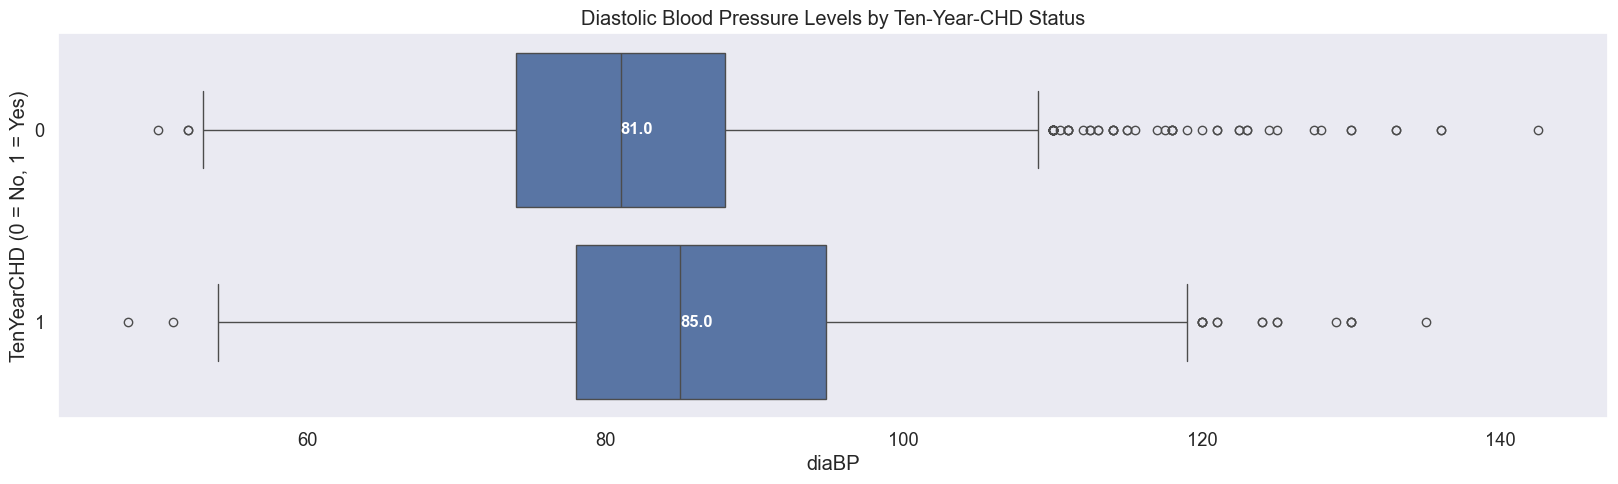

In [28]:
plot_variable_by_chd(df, "diaBP", "Diastolic Blood Pressure Levels by Ten-Year-CHD Status")

#### Analysis by **Blood Pressure: Insights**
- Higher blood pressure increases CHD risk: Both systolic and diastolic values are higher among individuals who developed CHD, with risk rising steeply across BP categories.
- Most of the population is not in the normal range: Around 75% of individuals fall into At Risk or Hypertensive categories, while only ~24% are truly normal.
- Prehypertension is the most common stage, affecting nearly 40% of the population, highlighting a large group at risk of progressing to more severe hypertension.

---

### 2.6. Analysis by **Hypertension**

#### 2.6.1. Prevalent Hypertension distribution

In [29]:
df_hyp_summary = summarize_chd(df, "prevalentHyp")
df_hyp_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
prevalentHyp,,,,
0,2321,68.5%,11.0%,7.6%
1,1068,31.5%,23.8%,7.5%


#### 2.6.2. Prevalent Hypertension distribution by TenYearCHD

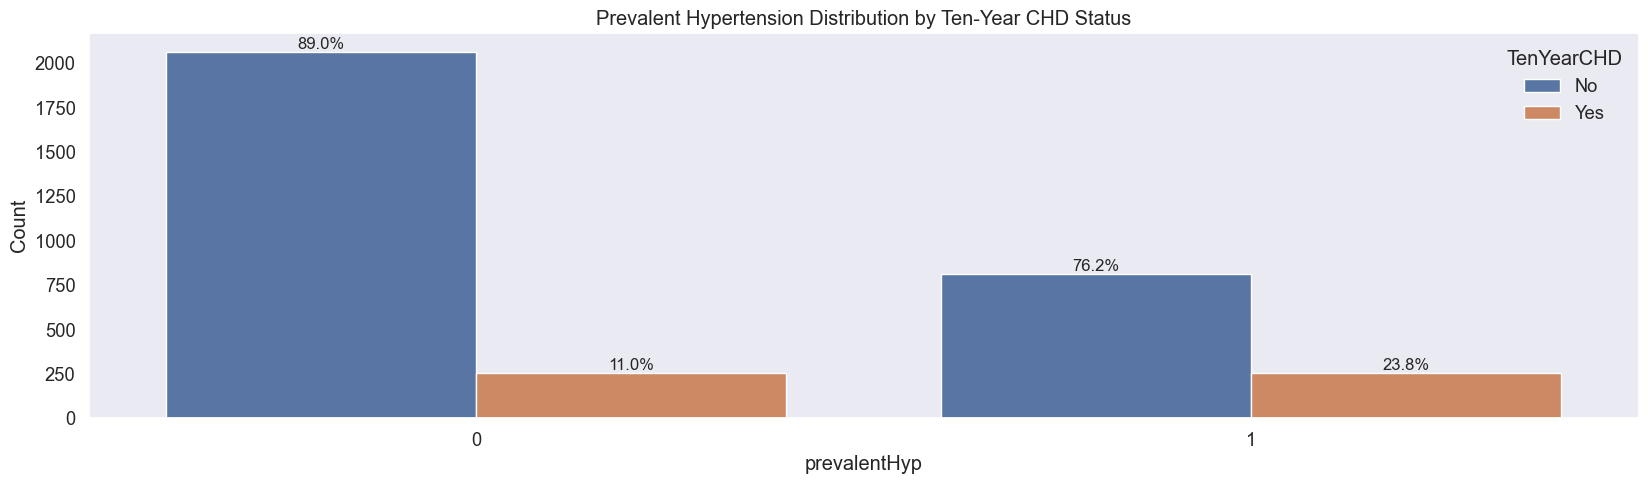

In [30]:
plot_chd_categorical_distribution(
    df=df, column_name="prevalentHyp", legend_labels=["No", "Yes"],
    title="Prevalent Hypertension Distribution by Ten-Year CHD Status"    
)

#### Analysis by **Prevalent Hypertension: Insights**
- A significant portion of the dataset (31.5%) has prevalent hypertension.
- Individuals with hypertension have more than double the rate of Ten-Year-CHD (23.8%) compared to those who do not have hypertension (11.0%).
- Despite representing a smaller percentage of the total population, the individuals with prevalent hypertension contribute almost equally to the absolute number of CHD cases (7.5%) as the much larger non-hypertensive group (7.6%).

---

### 2.7. Analysis by **Blood Pressure Medication**

#### 2.7.1. BPMeds prescription distribution

In [31]:
df_bpmeds_summary = summarize_chd(df, "BPMeds")
df_bpmeds_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
BPMeds,,,,
0,3289,97.0%,14.5%,14.1%
1,100,3.0%,33.0%,1.0%


#### 2.7.2. BPMeds prescription distribution by Ten-Year-CHD

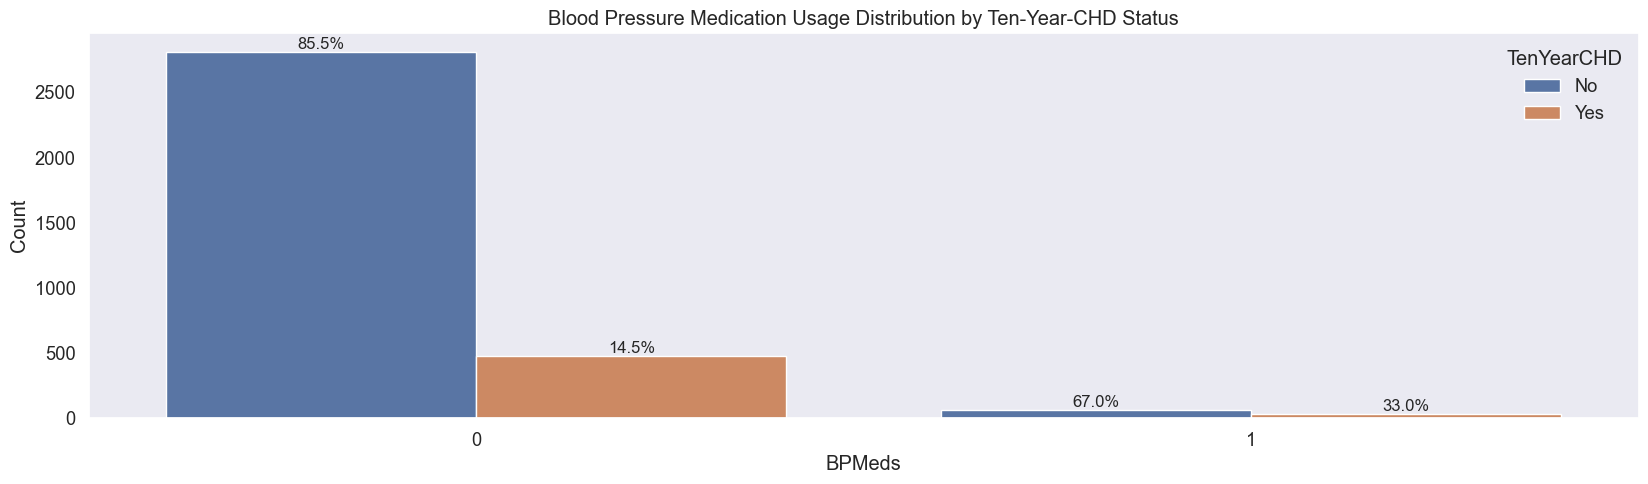

In [32]:
plot_chd_categorical_distribution(
    df=df, column_name="BPMeds", legend_labels=["No", "Yes"],
    title="Blood Pressure Medication Usage Distribution by Ten-Year-CHD Status"    
)

#### Analysis by **BPMeds: Insights**
- Only 3% of dataset uses blood pressure medication.
- Individuals who are on BP medication have a significantly higher rate of CHD (33.0%) compared to those who are not (14.5%)
- This finding suggests a **correlation, not causation**. Those on blood pressure medication likely have a higher Ten-Year-CHD rate because they already had high blood pressure, a major risk factor for CHD, and the medication is an indicator of that pre-existing condition.

---

### 2.8. Analysis by **Heart Rate**

- **Bradycardia:** < 60 bpm
- **Normal:** 60-100 bpm
- **Tachycardia** \> 100 bpm

In [33]:
df["heartRate"].describe()

count    3389.000000
mean       75.972263
std        11.968714
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

#### 2.8.1. Heart Rate distribution

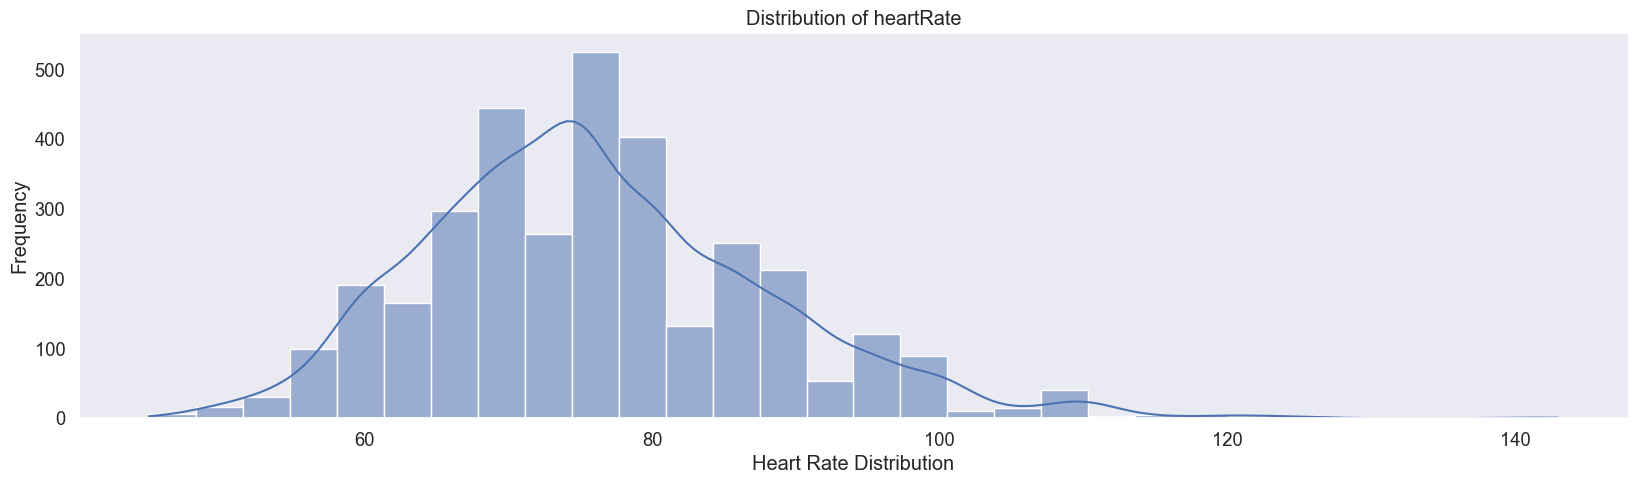

In [34]:
plot_hist(df, "heartRate", xlabel="Heart Rate Distribution")

#### 2.8.2. Heart Rate category distribution by Ten-Year-CHD status

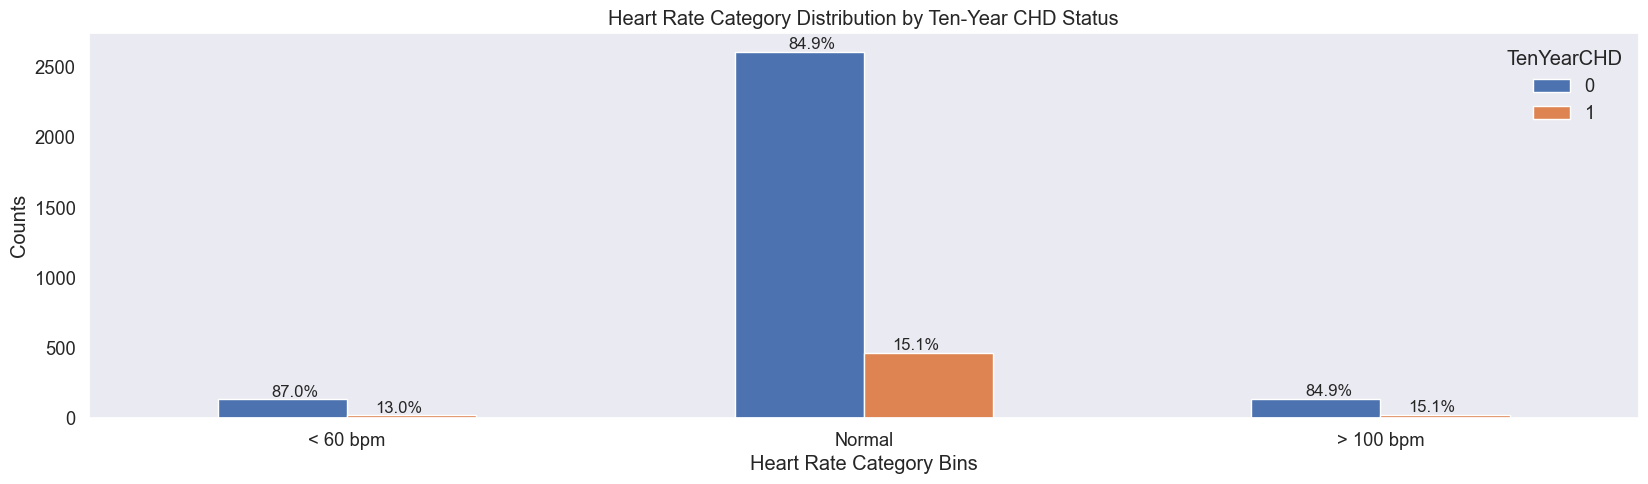

In [35]:
plot_bins(
    df, col="heartRate", bins=[0, 60, 100, 300],
    labels=["< 60 bpm", "Normal", "> 100 bpm"],
    title="Heart Rate Category Distribution by Ten-Year CHD Status",
    xlabel="Heart Rate Category Bins"
)

#### 2.8.3. Heart Rate boxplot by Ten-Year-CHD

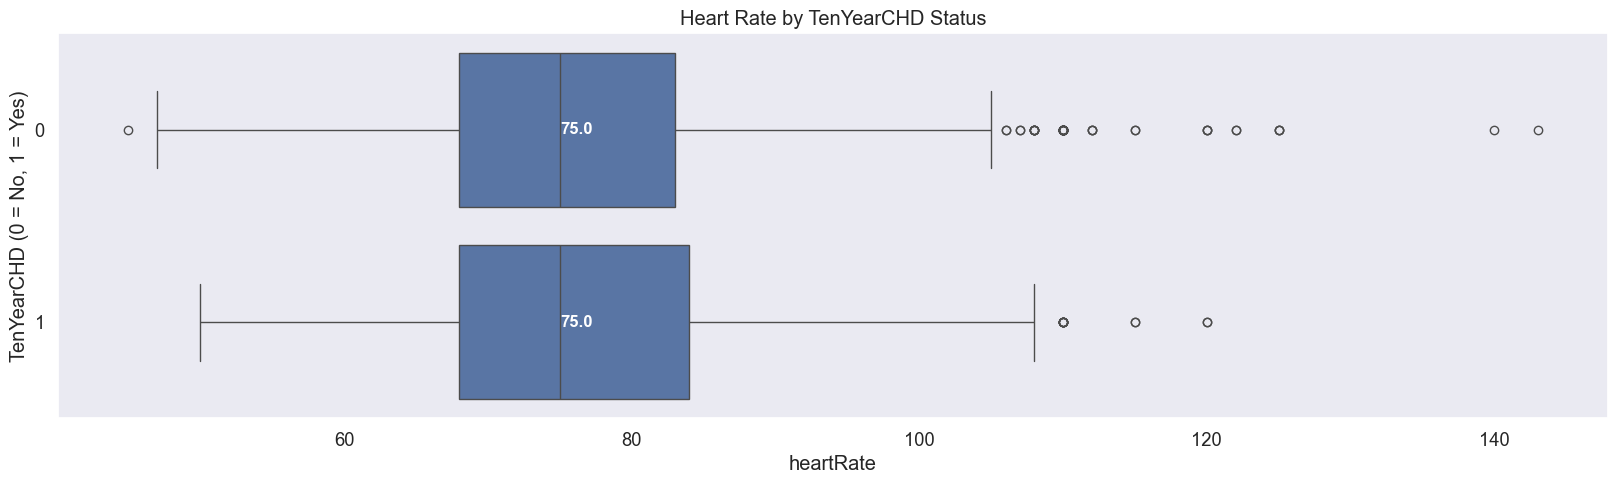

In [36]:
plot_variable_by_chd(df, "heartRate", "Heart Rate by TenYearCHD Status")

#### Analysis by **Heart Rate: Insights**
- Heart rate does not appear to be a strong predictor of Ten-Year-CHD risk in this dataset:
    -  The median heart rate is exactly 75.0 bpm for both groups
    -  Proportional Risk of CHD is Consistent:
        - < 60 bpm (Bradycardia): 13.0%.
        - 60-100 bpm (Normal): 15.1%.
        - \> 100 bpm (Tachycardia): 15.1%.

---

### 2.9. Analysis by **Prevalent Stroke**

#### 2.9.1. Prevalent Stroke distribution

In [37]:
df_stroke_summary = summarize_chd(df, "prevalentStroke")
df_stroke_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
prevalentStroke,,,,
0,3367,99.4%,14.9%,14.8%
1,22,0.6%,45.5%,0.3%


#### 2.9.2. Prevalent Stroke distribution by TenYearCHD

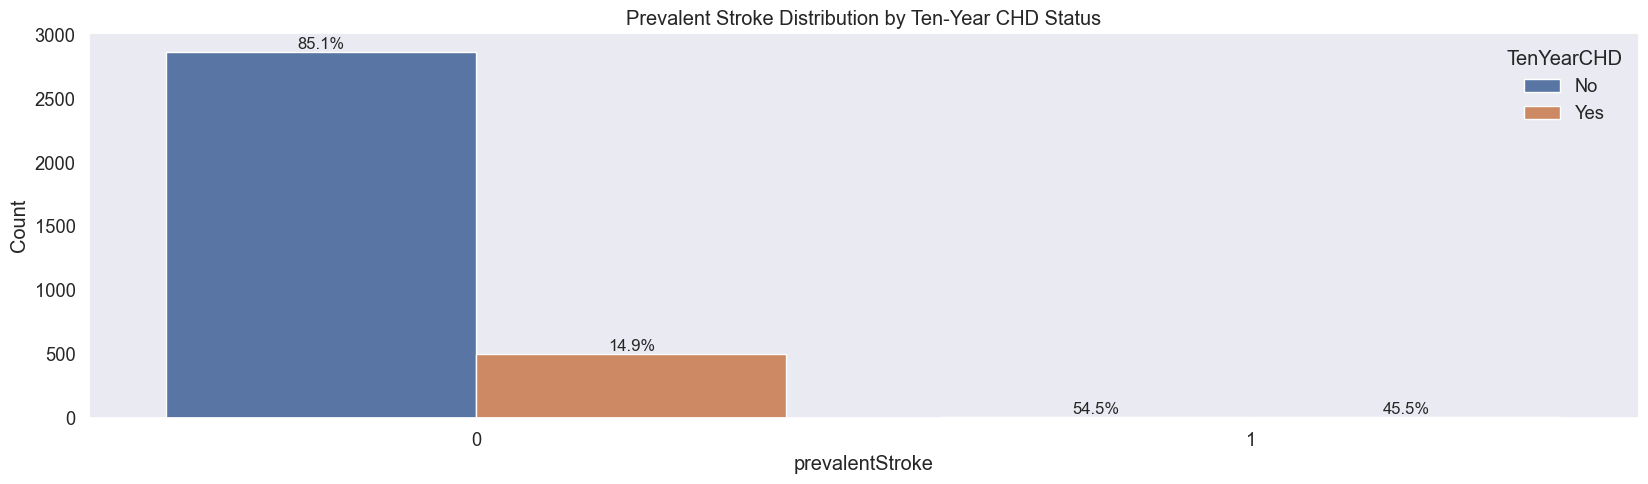

In [38]:
plot_chd_categorical_distribution(
    df=df, column_name="prevalentStroke", legend_labels=["No", "Yes"],
    title="Prevalent Stroke Distribution by Ten-Year CHD Status"    
)

#### 2.9.3. Correlation between Prevalent Stroke & TenYearCHD

In [39]:
correlation_coefficient, correlation_interpretation = calculate_phi_correlation(df, "prevalentStroke", "TenYearCHD")

print(f"Phi Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"Interpretation: {correlation_interpretation}")

Phi Correlation Coefficient: 0.0636
Interpretation: Very weak correlation


#### Analysis by **Prevalent Stroke: Insights**
- Individuals with a prevalent stroke is accounting for only 0.6% of the dataset.
- Given the small sample size for individuals with a prevalent stroke, the apparent difference in Ten-Year-CHD rates is likely not statistically significant. A larger dataset would be needed to draw more definitive conclusions about this relationship.

---

### 2.10. Analysis by **Total Cholesterol**

Generally considered total cholesterol levels (mg/dL):
- **Normal:** <200
- **At Risk:** 200-239
- **High:** >240

In [40]:
df["totChol"].describe()

count    3389.000000
mean      237.035114
std        45.000009
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

#### 2.10.1. Total Cholesterol distribution

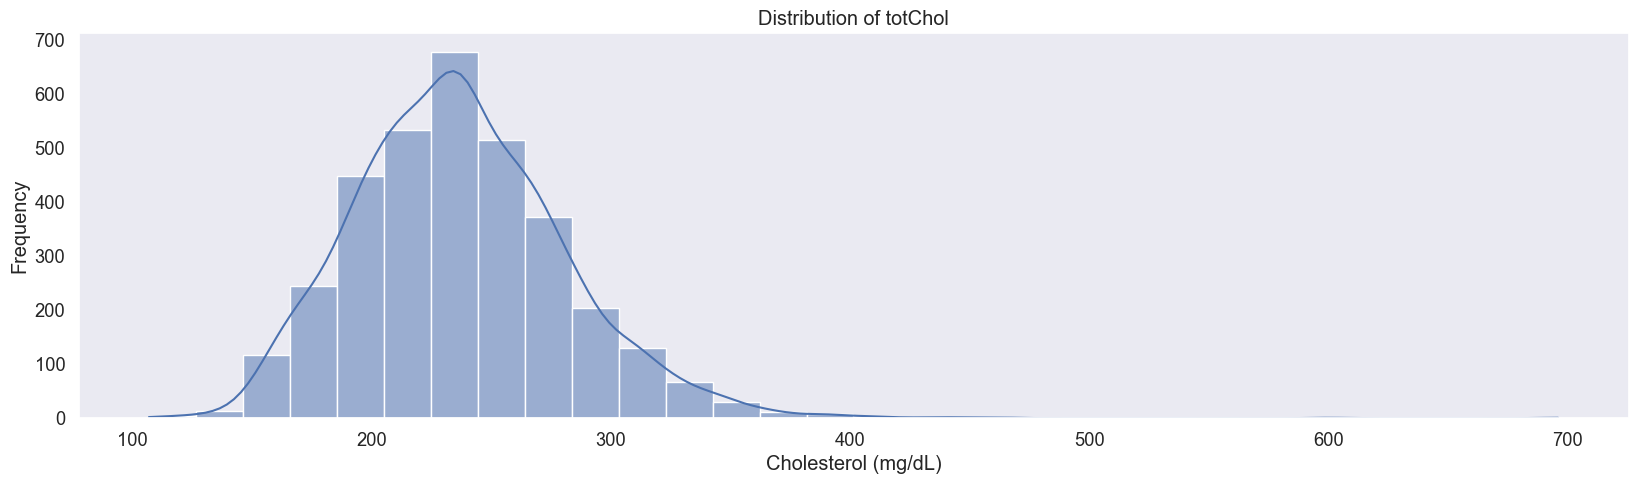

In [41]:
plot_hist(df, "totChol", xlabel="Cholesterol (mg/dL)")

#### 2.10.2. Total Cholesterol Level distribution by TenYearCHD status

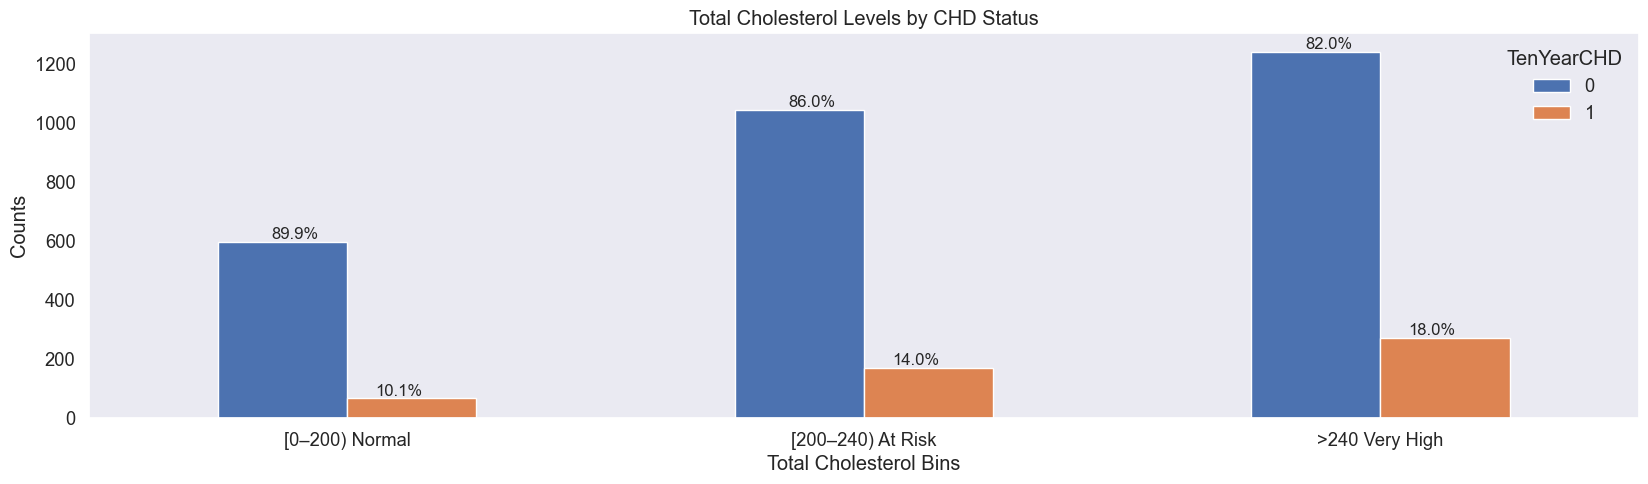

In [42]:
plot_bins(
    df, col="totChol", bins=[0, 200, 240, 700],
    labels=["[0–200) Normal", "[200–240) At Risk", ">240 Very High"],
    title="Total Cholesterol Levels by CHD Status",
    xlabel="Total Cholesterol Bins"
)

#### 2.10.3. Total Cholesterol boxplot by TenYearCHD

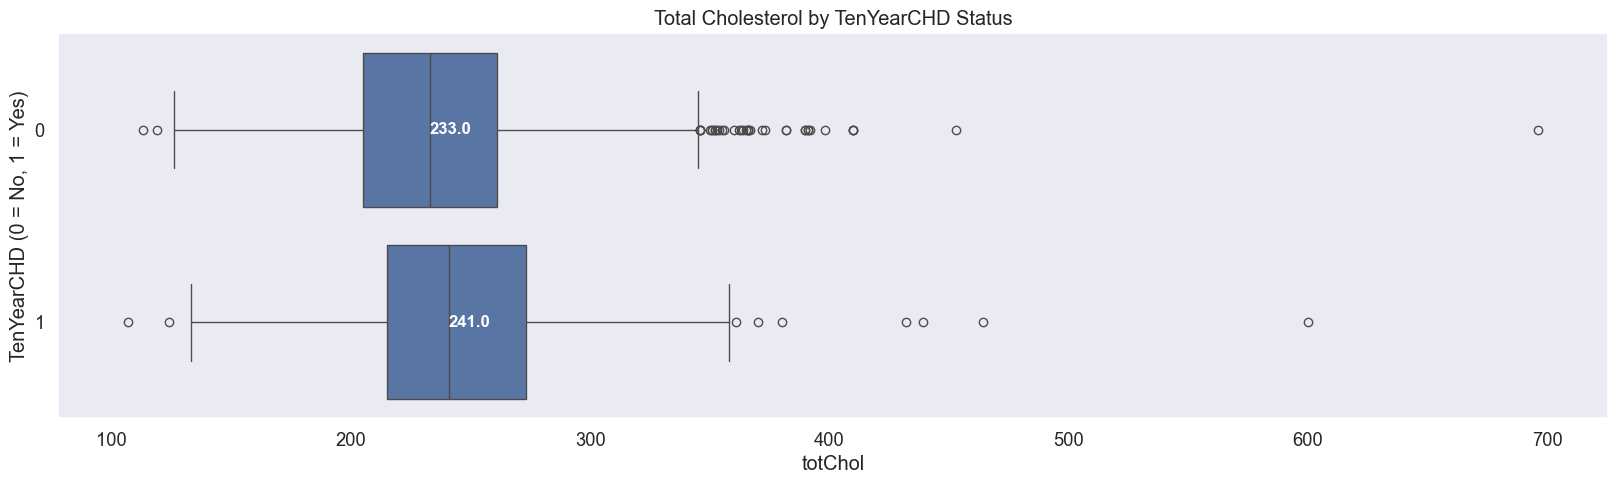

In [43]:
plot_variable_by_chd(df, "totChol", "Total Cholesterol by TenYearCHD Status")

#### Analysis by **Total Cholesterol: Insights**
- High overall cholesterol: Mean 237 mg/dL, in the “At Risk” range.
- Right-skewed distribution, with some values nearing 700 mg/dL.
- Higher cholesterol correlates with greater 10-year CHD risk.
- Ten-Year-CHD risk group shows higher median cholesterol (241 mg/dL) than no-risk group (233 mg/dL).

---

### 2.11. Analysis by **Body Mass Index (BMI)**

BMI Categories for Adults:

- **Underweight**: < 18.5
- **Normal Weight**: 18.5 - 24.9
- **Overweight**: 25.0 - 29.9
- **Obesity**: 30.0+
    - Class 1: 30.0 to 34.9
    - Class 2: 35.0 to 39.9
    - Class 3 (Severe Obesity): 40.0 or higher

In [44]:
df["BMI"].describe()

count    3389.00000
mean       25.78861
std         4.10186
min        15.96000
25%        23.03000
50%        25.38000
75%        27.99000
max        56.80000
Name: BMI, dtype: float64

#### 2.11.1. BMI distribution

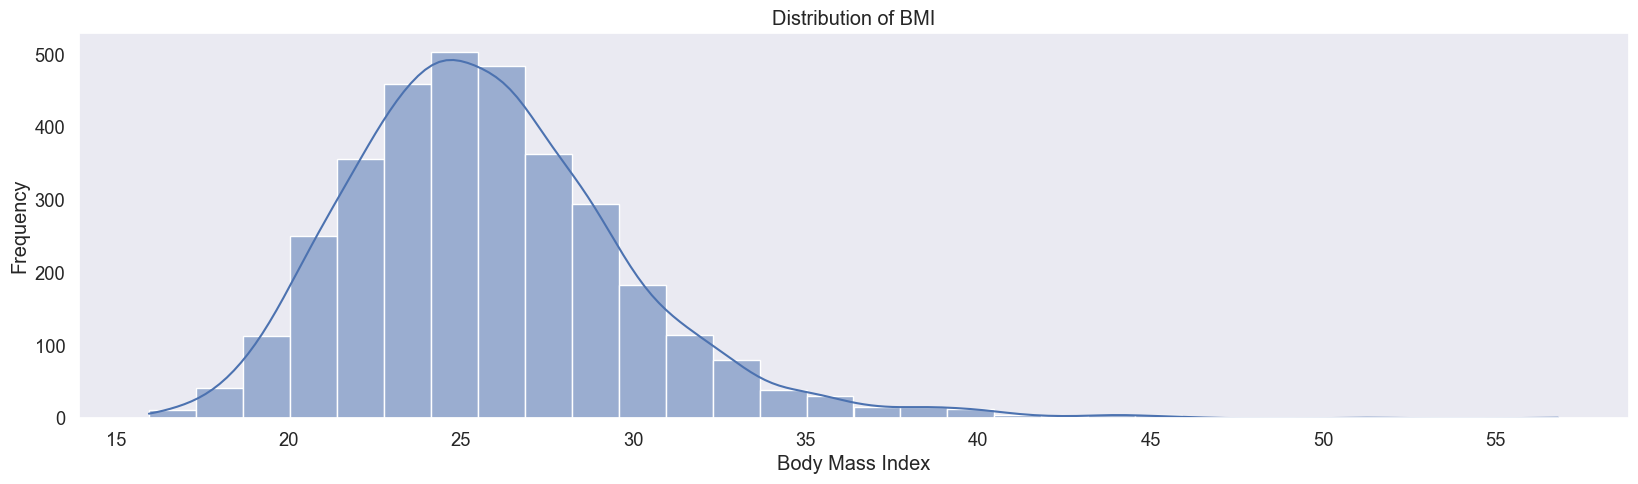

In [45]:
plot_hist(df, "BMI", xlabel="Body Mass Index")

#### 2.11.2. BMI category distribution by Ten-Year-CHD status

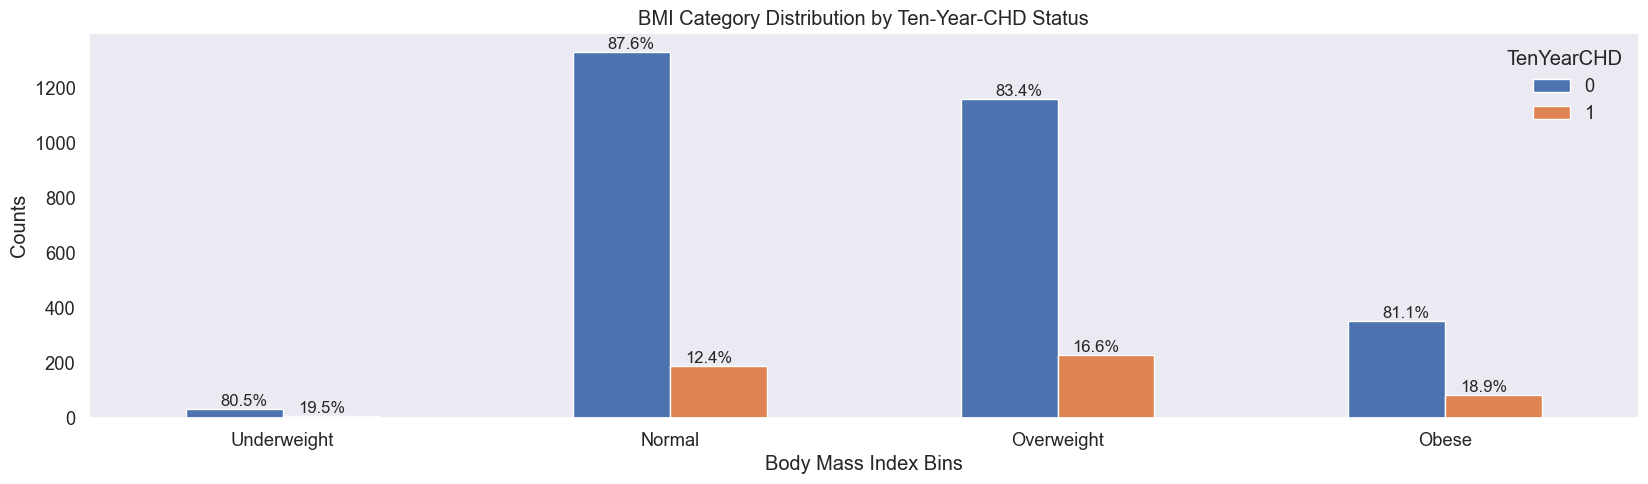

In [46]:
plot_bins(
    df, col="BMI", bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"],
    title="BMI Category Distribution by Ten-Year-CHD Status",
    xlabel="Body Mass Index Bins"
)

#### 2.11.3. BMI boxplot by Ten-Year-CHD

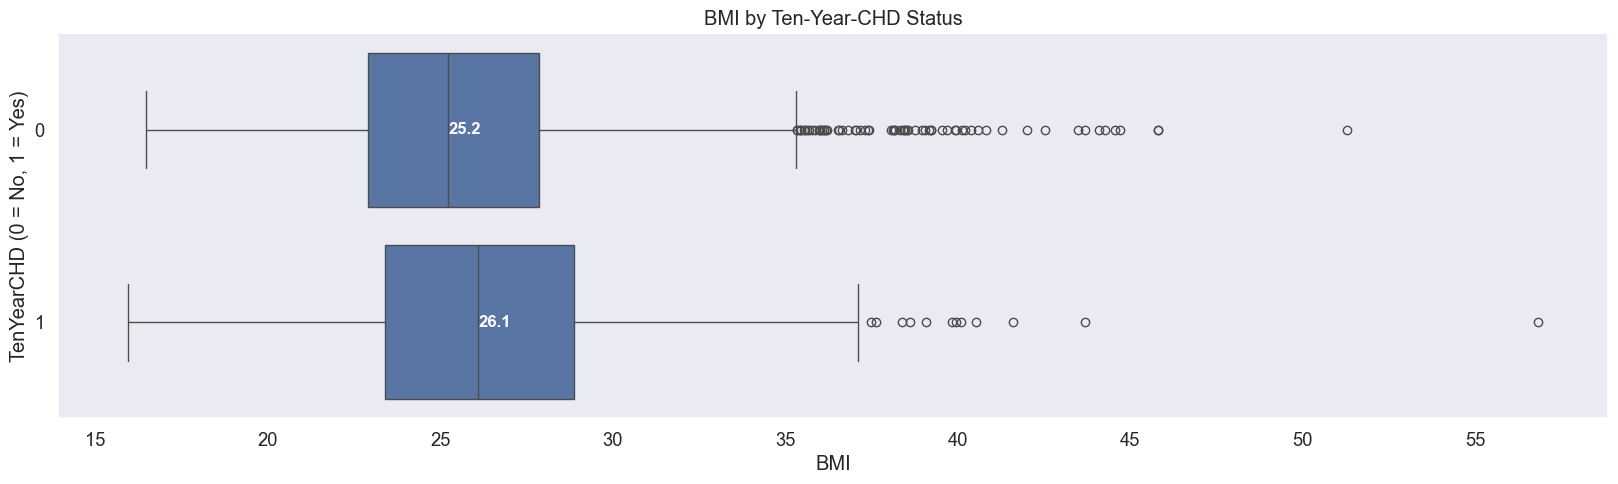

In [47]:
plot_variable_by_chd(df, "BMI", "BMI by Ten-Year-CHD Status")

#### Analysis by **Body Mass Index (BMI): Insights**
- People with CHD had a higher median BMI (26.1 vs. 25.2).
- CHD risk rises with BMI:
    - Normal weight: 12.4%
    - Overweight: 16.6%
    - Obese: 18.9%
- Unexpected pattern in underweight group: CHD prevalence is 19.5%, higher than in the obese group. This reflect a small sample size or underlying health issues driving both low weight and elevated CHD risk.

---

### 2.12. Analysis by **Glucose**

Glucose level range (mg/dL):
- **Normal:** < 100
- **Pre-diabetes:** 100-125 
- **Diabetes:** \> 125

In [48]:
df["glucose"].describe()

count    3389.000000
mean       82.079033
std        23.169415
min        40.000000
25%        72.000000
50%        79.000000
75%        86.000000
max       394.000000
Name: glucose, dtype: float64

#### 2.12.1. Glucose distribution

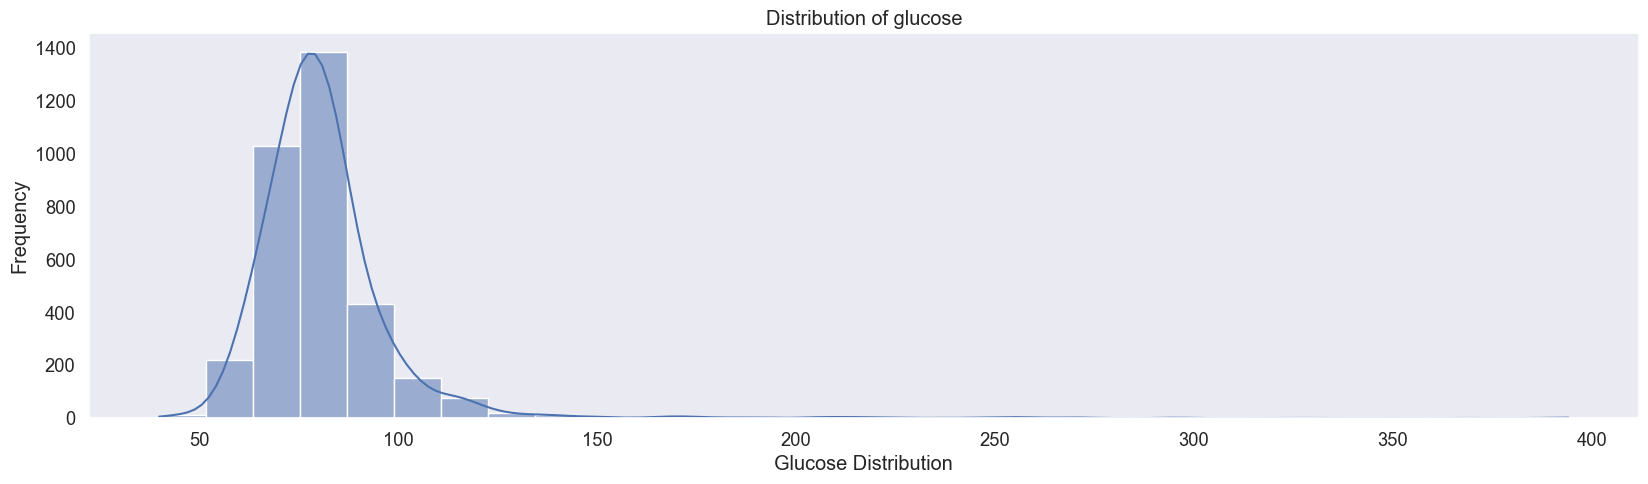

In [49]:
plot_hist(df, "glucose", xlabel="Glucose Distribution")

#### 2.12.2. Glucose category distribution by Ten-Year-CHD status

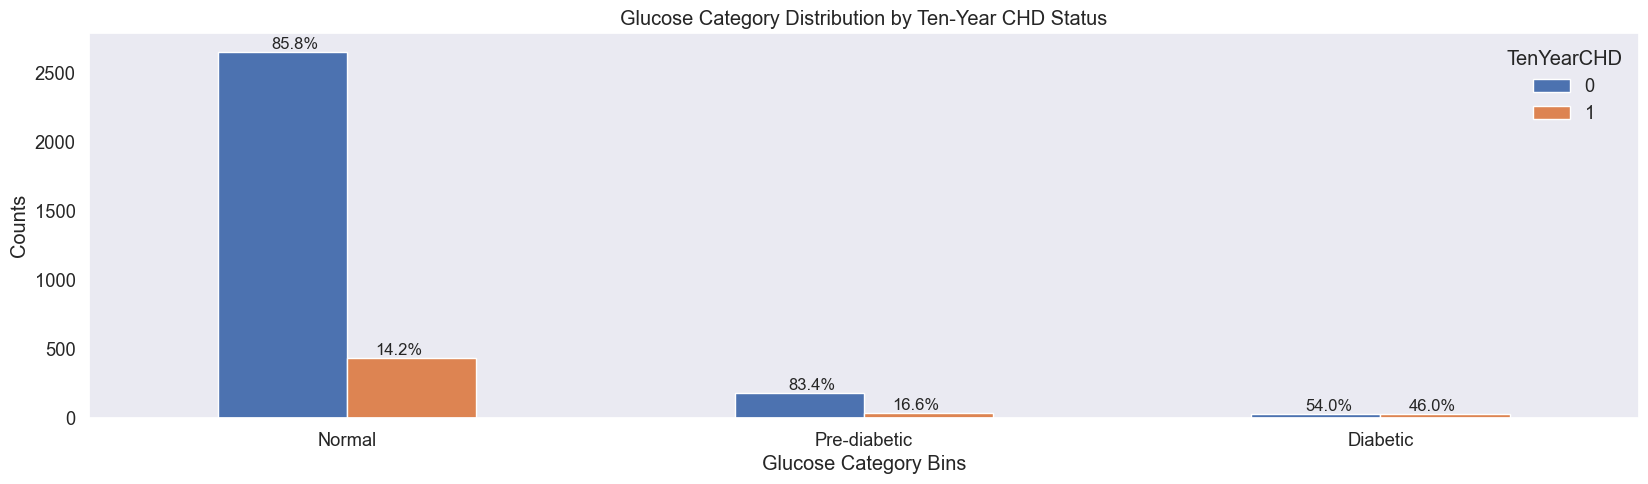

In [50]:
plot_bins(
    df, col="glucose", bins=[50, 100, 126, 300],
    labels=["Normal", "Pre-diabetic", "Diabetic"],
    title="Glucose Category Distribution by Ten-Year CHD Status",
    xlabel="Glucose Category Bins"
)

#### Analysis by **Glucose: Insights**
- Ten-Year-CHD risk increases with Glucose Category :
    - Normal : 14.2%.
    - Pre-diabetic : 16.6%.
    - Diabetic : 46.0%.
- Glucose level is a strong predictor of Ten-year-CHD

---

### 2.13. Analysis by **Diabetes**

#### 2.13.1. Diabetes distribution

In [51]:
df_diabetes_summary = summarize_chd(df, "diabetes")
df_diabetes_summary

,Count,Percentage,CHD_Percentage,CHD_Absolute_Percentage
diabetes,,,,
0,3302,97.4%,14.4%,14.1%
1,87,2.6%,37.9%,1.0%


#### 2.13.2. Diabetes distribution

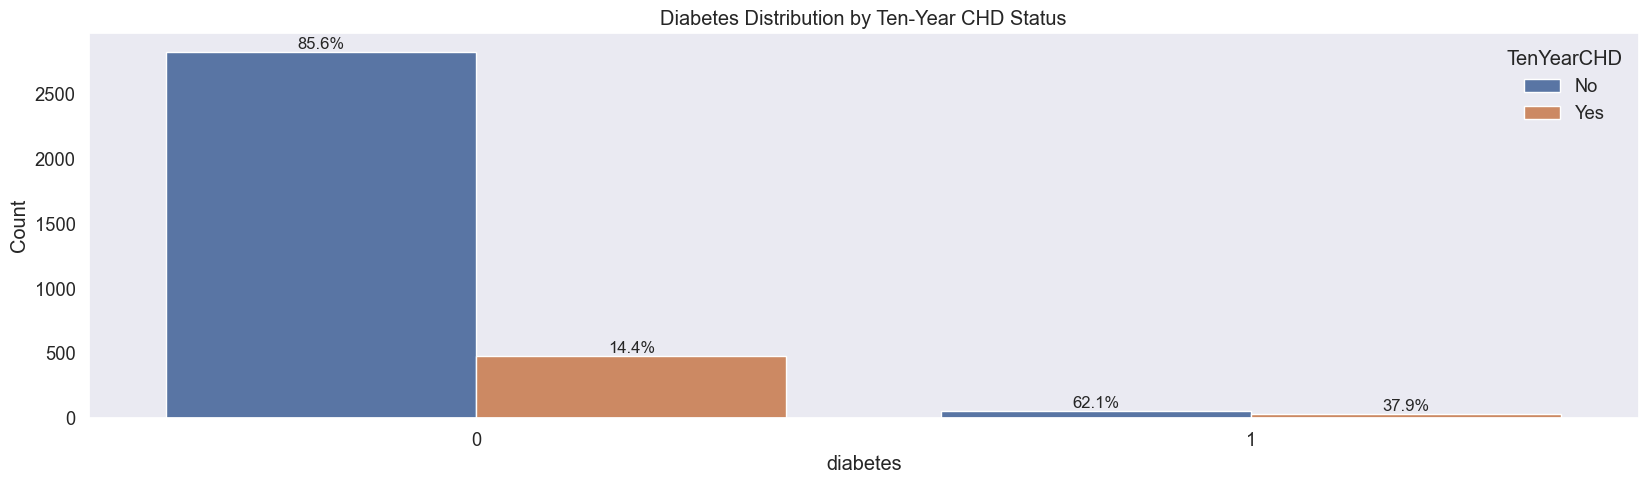

In [52]:
plot_chd_categorical_distribution(
    df=df, column_name="diabetes", legend_labels=["No", "Yes"],
    title="Diabetes Distribution by Ten-Year CHD Status"    
)

In [53]:
correlation_coefficient, correlation_interpretation = calculate_phi_correlation(df, "diabetes", "TenYearCHD")

print(f"Phi Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"Interpretation: {correlation_interpretation}")

Phi Correlation Coefficient: 0.1013
Interpretation: Weak correlation


#### Analysis by **Diabetes: Insights**
- The number of individuals with diabetes is accounting for only 2.6% of the dataset.
- Although diabetics are 2.6× more likely to develop CHD, the correlation appears weak due to class imbalance—non-diabetics make up over 97% of the data, diluting the effect.

---

#### Following part:
- [III Modeling](https://github.com/monikase/Data_Science/blob/main/03_CHD_Prediction/CHD_III_Modeling.ipynb) 